# <center>Livrable Projet DATA SCIENCE</center>

## Livrable 1 - Prétraitement (denoising/sharpening…)

Le but est de traiter un ensemble de photographies afin de les rendre mieux traitables par les algorithmes de Machine Learning. Il y a deux traitements à réaliser : le débruitage, et l’affutage. Vous devrez produire un notebook Jupyter explicitant ces étapes de prétraitement, et leurs performances. Ces algorithmes s’appuieront sur des notions assez simples autour des filtres de convolution, et les appliqueront pour améliorer la qualité de l’image. Il faudra notamment décider d’un compromis entre dé-bruitage et affutage.

Le notebook devra intégrer :
<ul>
    <li>Le code de chargement du fichier.</li>
    <li>Le code du débruitage sur un sous-ensemble d’images bruitées. Le code doit être accompagné d’explications.</li>
    <li>Le code de l’affutage sur un sous-ensembles d’images floutées. Le code doit être accompagné d’explications.</li>
    <li>
        Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.
    </li>
</ul>

<b>Ce livrable est à fournir pour le 18/12/2020</b>

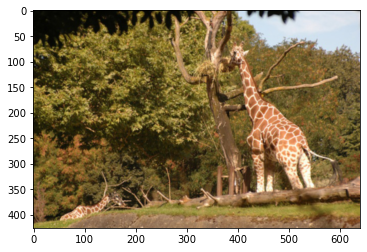

In [117]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import misc

# Path to the 'to modify' images
IMAGES_PATH = "./Dataset/"
IMAGE_TYPE = "Blurry/blurry_"
IMAGE_EXT = ".jpg"

# Open single picture
img = imageio.imread(IMAGES_PATH + IMAGE_TYPE + '001' + IMAGE_EXT)

# Display the choosen image
plt.imshow(img)

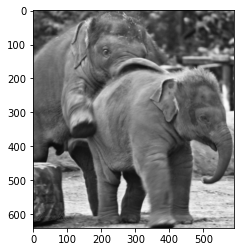

In [118]:
from skimage import io

# Convert RGB image to grey image
def RgbToGrey(image_number):
    return io.imread(IMAGES_PATH + IMAGE_TYPE + image_number + IMAGE_EXT, as_gray=True) 

grey_img = RgbToGrey('033')

plt.imshow(grey_img, cmap=plt.get_cmap('gray'))
plt.show()

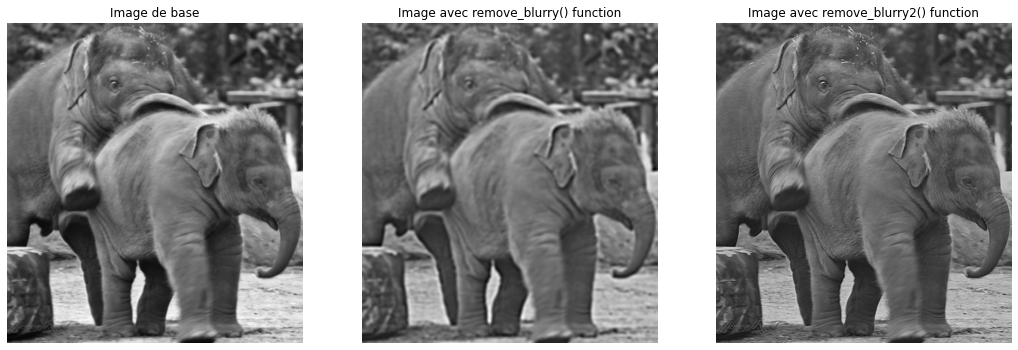

In [119]:
from scipy import ndimage

def remove_blurry_with_gauss(image, alpha=30):
    blurred_f = ndimage.gaussian_filter(grey_img, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, sigma=1)
    return blurred_f + alpha * (blurred_f - filter_blurred_f)

def remove_blurry_with_convolution(image):
    sharpning_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return ndimage.convolve(image, sharpning_filter)

# Taille des images à afficher
plt.figure(figsize=(18, 8))

plt.subplot(131)
plt.imshow(grey_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Image de base")

plt.subplot(132)
plt.imshow(remove_blurry_with_gauss(grey_img), cmap=plt.cm.gray)
plt.axis('off')
plt.title("Image avec remove_blurry() function")

plt.subplot(133)
plt.imshow(remove_blurry_with_convolution(grey_img), cmap=plt.cm.gray)
plt.axis('off')
plt.title("Image avec remove_blurry2() function")

plt.show()

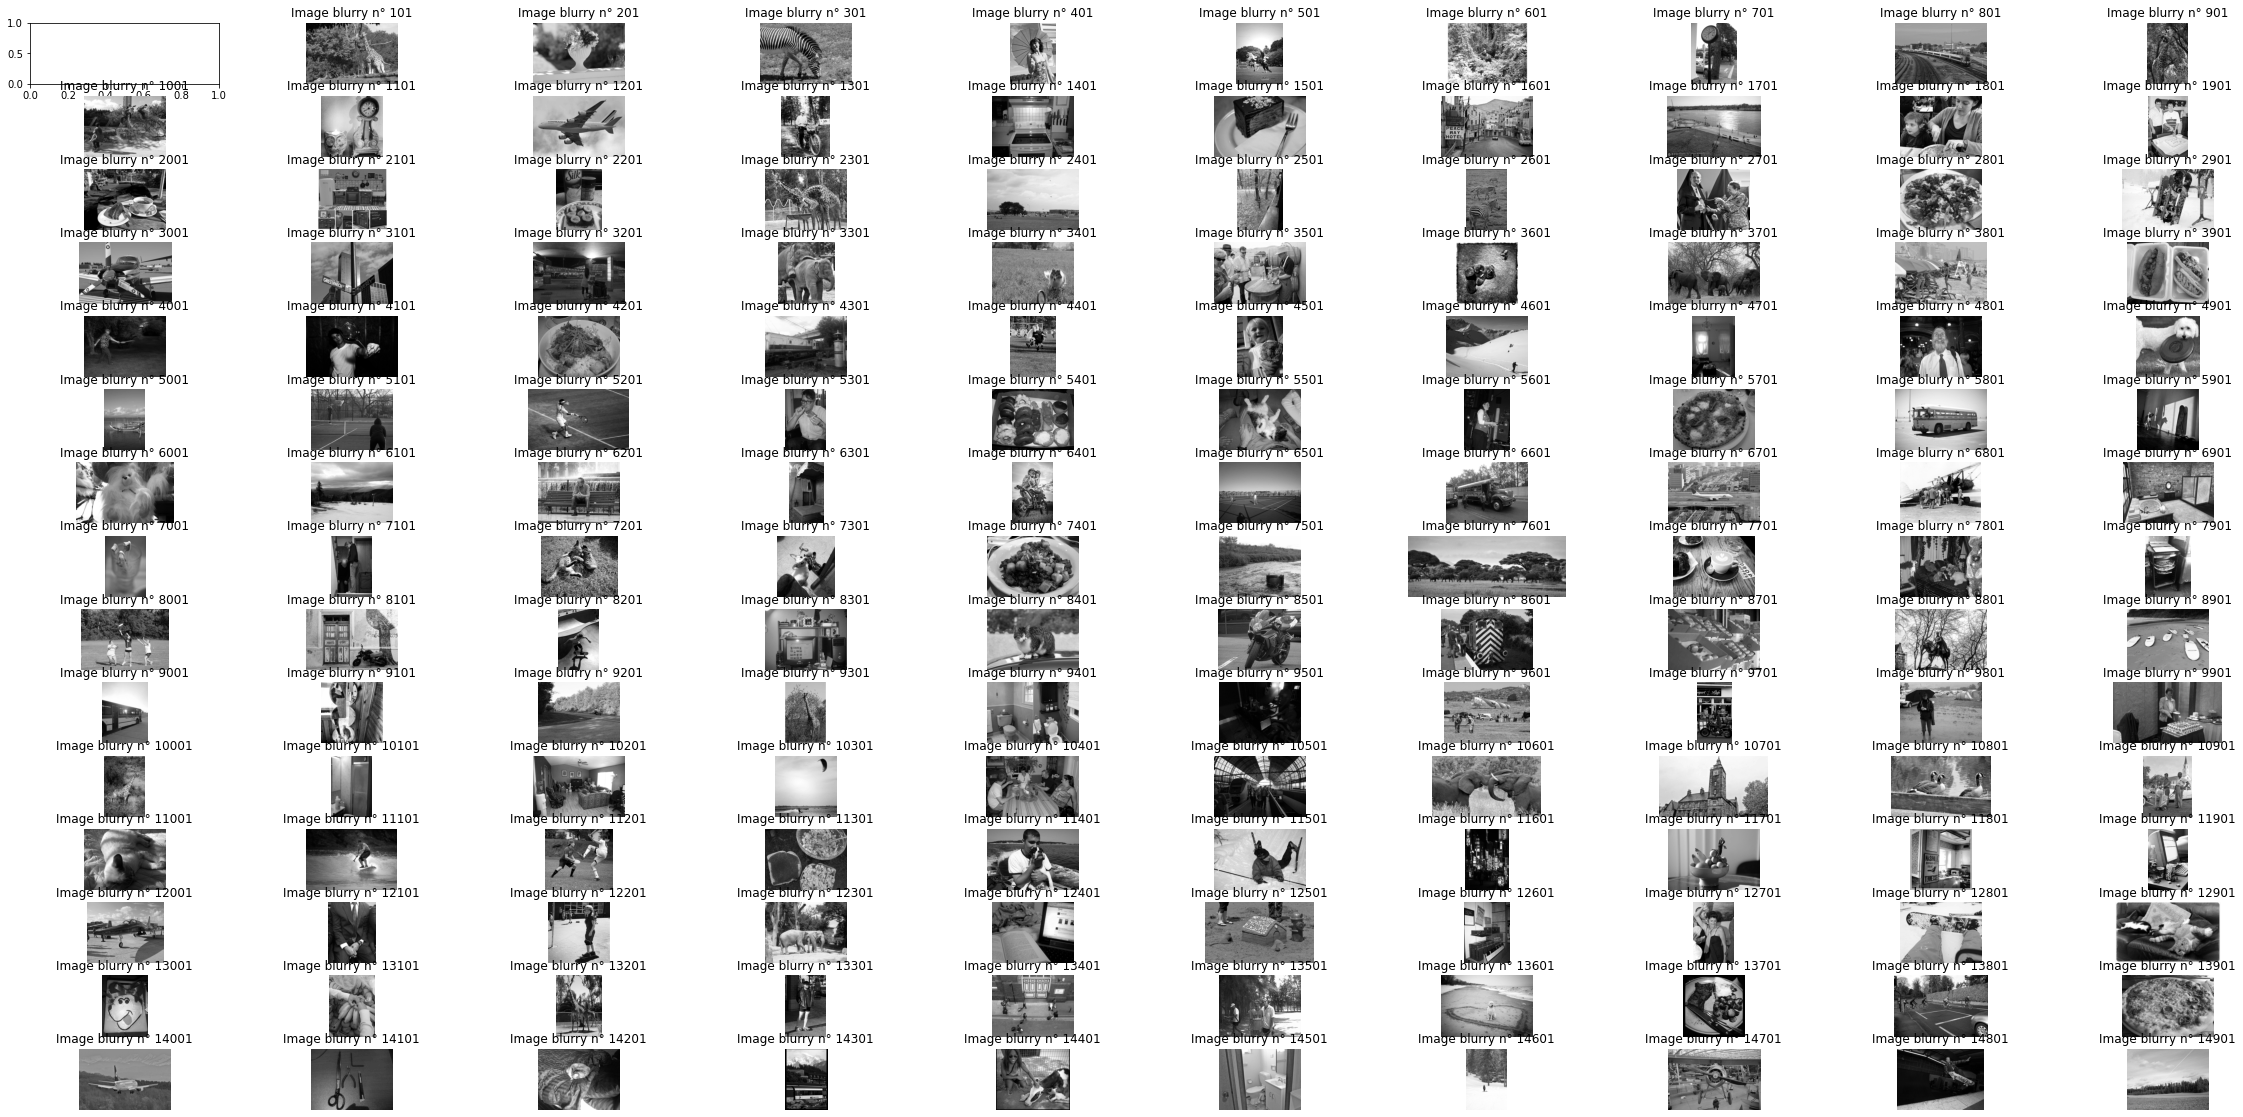

In [151]:
import os

# Path to the 'to modify' images
IMAGES_PATH = "./Dataset/"
IMAGE_TYPE = "Blurry/blurry_"
IMAGE_EXT = ".jpg"

def getFileNumberFromFolder(folder):
    return len(os.listdir(folder))

file_number = getFileNumberFromFolder(IMAGES_PATH + "Blurry/")
fig, axs = plt.subplots(file_number//10, 10, figsize=(40,20))
for i in range(1, file_number):

    # Open single picture
    # .zfill(3) Complete the number with 0 to have a 3caracters number
    img = RgbToGrey(str(i).zfill(3))

    # Remove blur from grey image
    remove_blurry_with_convolution(img)

    # Image diplay
    ax = axs[i//10, i%10]
    ax.axis('off')
    ax.set_title("Image blurry n° "+ str(A0+i*step))
    ax.imshow(img, cmap=plt.cm.gray)

# Display the choosen images
plt.show()